<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">House Price Prediction 🏡</h1></center>

<center><img src="https://images.unsplash.com/photo-1516156008625-3a9d6067fab5?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80"></center>

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Importing the Essential Libraries, Metrics</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Loading the Data</h1>

In [2]:
df = pd.read_csv("Property_master.csv")

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Exploratory Data Analysis</h1>

***Taking a look at the first 5 rows of the dataset***

In [3]:
df.head()

,index_no,property_address,bedrooms,bathrooms,agent_name,area_code,telephone,price,media_description,media_category_id,...,org_ph_no,org_designation,prop_zone_type,prop_parking,prop_parking_space,prop_type,province_name,latitude,longitude,postcode
0,345,"1585 Rue du Godendard|Drummondville, Quebec J2...",NaN,NaN,Steve Boisvert,819.0,4610475.0,65000,AlternateFeatureSheetWebsite,1.0,...,4743134.0,Real Estate Agency,Residential,NaN,NaN,Vacant Land,Quebec,45.851098,-72.369032,J2B7T5
1,159,"#4 1955 Northern Flicker Court,|Kelowna, Briti...",2.0,3.0,Mike Jamieson,604.0,3495780.0,849000,VideoTourWebsite,2.0,...,8176506.0,NaN,NaN,Attached Garage,2.0,Single Family,British Columbia,49.983067,-119.437400,V1V0G2
2,266,"2188 Peters Road,|West Kelowna, British Columb...",4.0,4.0,Anthony Bastiaanssen,250.0,7188669.0,1075000,VideoTourWebsite,2.0,...,6206788.0,NaN,NaN,Attached Garage (2),6.0,Single Family,British Columbia,49.830177,-119.613571,V4T2C3
3,314,"#116 1850 Shannon Lake Road,|West Kelowna, Bri...",2.0,2.0,Rebecca April,250.0,8595848.0,449900,AlternateFeatureSheetWebsite,1.0,...,7175000.0,NaN,NaN,Carport (1),4.0,Single Family,British Columbia,49.865444,-119.591808,V4T1L6
4,267,"3076 Quail Crescent,|Kelowna, British Columbia...",3.0,4.0,Kristen Tranfield,250.0,8781393.0,1150000,NaN,NaN,...,8627675.0,NaN,NaN,Attached Garage (2),4.0,Single Family,British Columbia,49.967945,-119.401396,V1V2A1


***Checking the shape—i.e. size—of the data***

In [4]:
df.shape

(404, 34)

***Learning the dtypes of columns' and how many non-null values are there in those columns***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index_no            404 non-null    int64  
 1   property_address    404 non-null    object 
 2   bedrooms            383 non-null    float64
 3   bathrooms           383 non-null    float64
 4   agent_name          404 non-null    object 
 5   area_code           402 non-null    float64
 6   telephone           402 non-null    float64
 7   price               404 non-null    int64  
 8   media_description   230 non-null    object 
 9   media_category_id   230 non-null    float64
 10  media_category_url  230 non-null    object 
 11  media_video_type    127 non-null    object 
 12  mls_number          404 non-null    object 
 13  property_type       377 non-null    object 
 14  building_stories    262 non-null    float64
 15  interior_size       289 non-null    object 
 16  exterior

***Getting the statistical summary of dataset***

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index_no,404.0,2.158663e+02,1.407366e+02,0.000000e+00,1.007500e+02,2.015000e+02,3.062500e+02,5.510000e+02
bedrooms,383.0,3.169713e+00,1.221501e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,7.000000e+00
bathrooms,383.0,2.224543e+00,1.086193e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00
area_code,402.0,5.427065e+02,2.133970e+02,2.040000e+02,4.030000e+02,5.190000e+02,7.050000e+02,9.050000e+02
telephone,402.0,6.261265e+06,2.368341e+06,2.027494e+06,4.343734e+06,6.371700e+06,8.324634e+06,9.997653e+06
price,404.0,6.310118e+05,4.570725e+05,1.500000e+04,3.493750e+05,5.199000e+05,7.990000e+05,3.995000e+06
media_category_id,230.0,1.604348e+00,6.303657e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00
building_stories,262.0,2.024809e+00,3.404394e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.400000e+01
agent_id,404.0,1.829720e+06,2.652763e+05,1.382780e+06,1.558918e+06,1.933826e+06,2.059202e+06,2.190894e+06
org_id,404.0,1.814044e+05,1.081880e+05,4.594600e+04,5.451600e+04,2.585785e+05,2.837755e+05,2.947720e+05


***Visualizing the correlations between numerical variables***

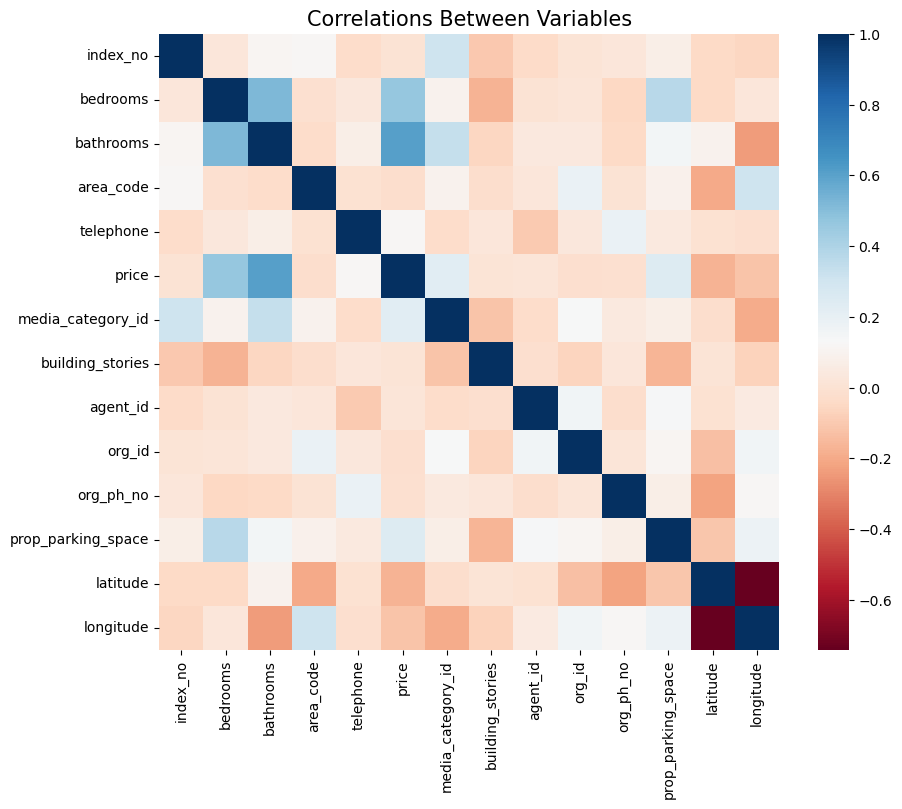

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Feature Selection</h1>

***We are selecting numerical features which have more than 0.40 or less than -0.40 correlation rate based on Pearson Correlation Method—which is the default value of parameter "method" in corr() function. As for selecting categorical features, I selected the categorical values which I believe have significant effect on the target variable such as prop_parking_space.***

In [8]:
important_num_cols = list(df.corr()["price"][(df.corr()["price"]>0.40) | (df.corr()["price"]<-0.40)].index)
cat_cols = ['prop_parking_space']
important_cols = important_num_cols + cat_cols

####missing_cols=['bedrooms','building_stories','prop_parking_space']
####the_important_cols = important_num_cols + missing_cols


df = df[important_cols]

##df = df[important_num_cols]

***Checking for the missing values***

In [9]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
bedrooms               21
bathrooms              21
price                   0
prop_parking_space    199
dtype: int64
------------------------------
TOTAL MISSING VALUES: 241


In [10]:
columns_with_na = ['bathrooms','bedrooms','prop_parking_space']
df = df.dropna(axis=0, subset = columns_with_na)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 383
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedrooms            205 non-null    float64
 1   bathrooms           205 non-null    float64
 2   price               205 non-null    int64  
 3   prop_parking_space  205 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 8.0 KB


In [11]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
bedrooms              0
bathrooms             0
price                 0
prop_parking_space    0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Data Visualization</h1>

***Visualizing the Correlation between the numerical variables using pairplot visualization***

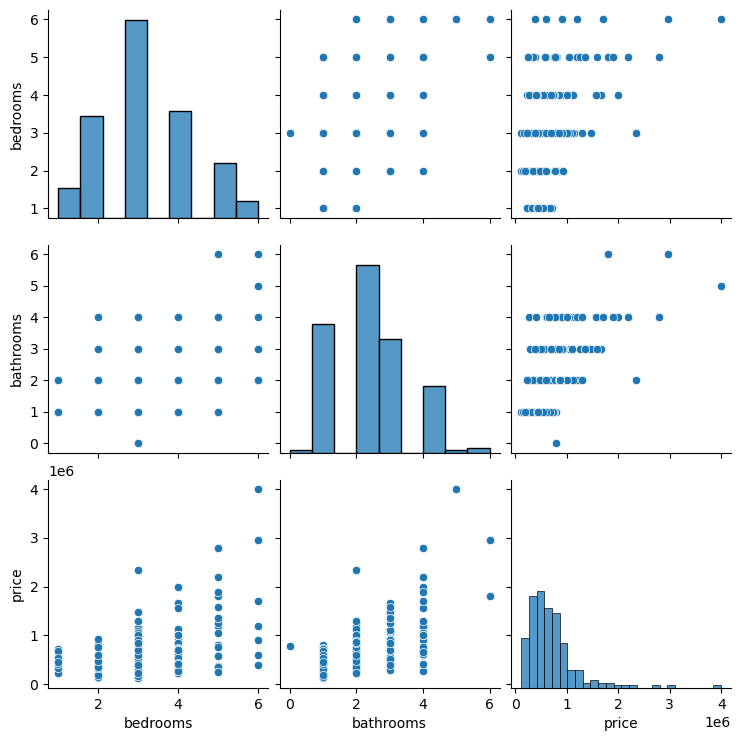

In [12]:
sns.pairplot(df[important_num_cols])

***Visualizing the Correlation between each column and the target variable using jointplot visualization***

<Figure size 1000x800 with 0 Axes>

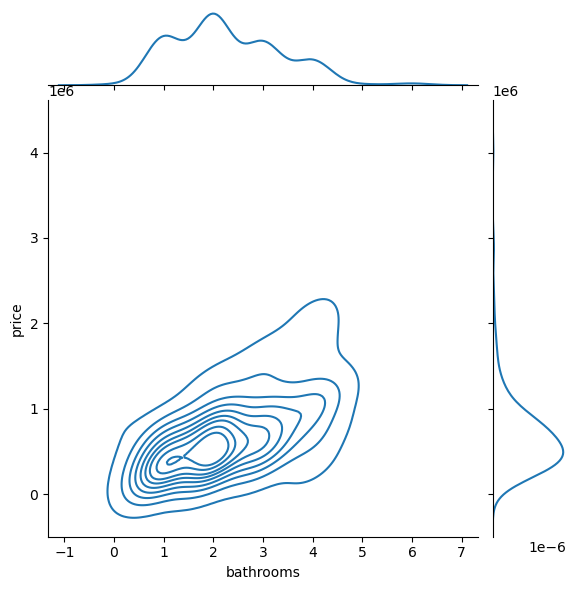

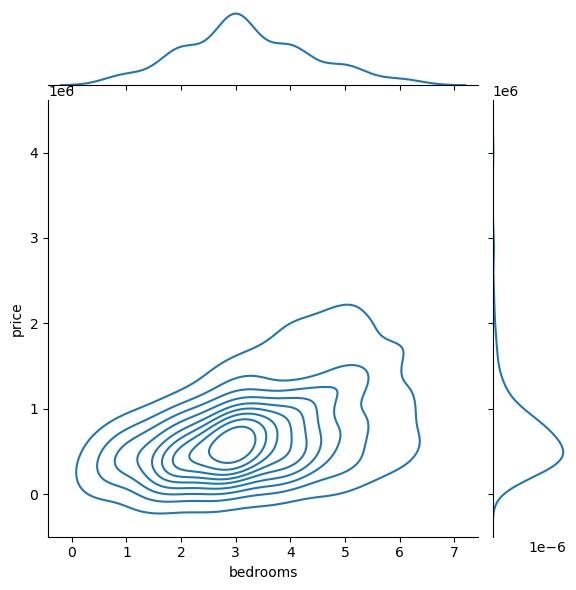

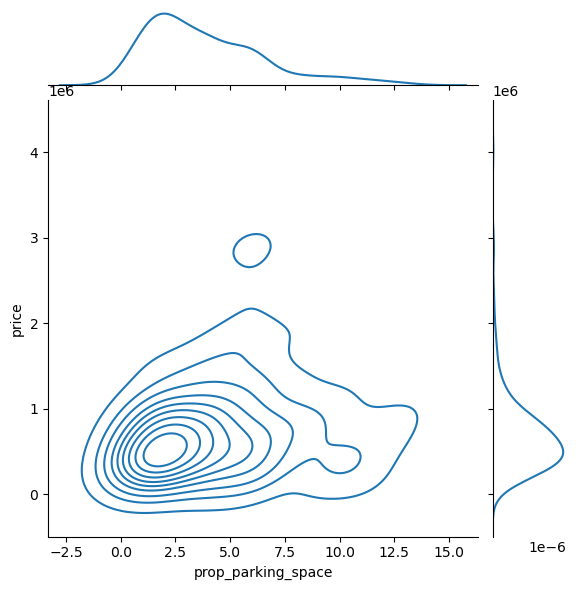

In [13]:
plt.figure(figsize=(10,8))
sns.jointplot(x=df["bathrooms"], y=df["price"], kind="kde")
sns.jointplot(x=df["bedrooms"], y=df["price"], kind="kde")
sns.jointplot(x=df["prop_parking_space"], y=df["price"], kind="kde")
plt.show()

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">X, y Split</h1>

***Splitting the data into X and y chunks***

In [14]:
X = df.drop("price", axis=1)
y = df["price"]

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">One-Hot Encoding</h1>

***Encoding the categorical features in X dataset by using One-Hot Encoding method***

In [15]:
X = pd.get_dummies(X, columns=cat_cols)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Standardizing the Data</h1>

***Standardizing the numerical columns in X dataset. StandardScaler() adjusts the mean of the features as 0 and standard deviation of features as 1. Formula that StandardScaler() uses is as follows:***

<center><img width="300px" src="https://www.thoughtco.com/thmb/gItmqGd5HlnhyPIiLm1YHXOlTnw=/330x242/filters:fill(auto,1)/zscore-56a8fa785f9b58b7d0f6e87b.GIF"></center>

In [16]:
important_num_cols.remove("price")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

***As you can see, standardization is done successfully***

In [17]:
X.head()

,bedrooms,bathrooms,prop_parking_space_0.0,prop_parking_space_1.0,prop_parking_space_2.0,prop_parking_space_3.0,prop_parking_space_4.0,prop_parking_space_5.0,prop_parking_space_6.0,prop_parking_space_7.0,prop_parking_space_8.0,prop_parking_space_9.0,prop_parking_space_10.0,prop_parking_space_11.0,prop_parking_space_12.0,prop_parking_space_13.0
1,-1.046441,0.674080,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.683563,1.607771,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,-1.046441,-0.259612,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,-0.181439,1.607771,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,1.548565,0.674080,0,0,0,0,0,0,0,1,0,0,0,0,0,0


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Train-Test Split</h1>

***Splitting the data into Train and Test chunks for better evaluation***

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Defining several evaluation functions for convenience***

In [19]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Machine Learning Models</h1>

In [20]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Linear Regression</h2>

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23567.890565943395
MSE: 1414931404.6297863
RMSE: 37615.57396384889
R2 Score: 0.8155317822983865
------------------------------
RMSE Cross-Validation: 36326.451444669496


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Ridge Regression</h2>

In [20]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23435.50371200822
MSE: 1404264216.8595588
RMSE: 37473.513537691644
R2 Score: 0.8169224907874508
------------------------------
RMSE Cross-Validation: 35887.852791598336


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Lasso Regression</h2>

In [21]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23560.45808027236
MSE: 1414337628.502095
RMSE: 37607.680445649596
R2 Score: 0.815609194407292
------------------------------
RMSE Cross-Validation: 35922.76936876075


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Elastic Net</h2>

In [22]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23792.743784996732
MSE: 1718445790.1371393
RMSE: 41454.14080809225
R2 Score: 0.775961837382229
------------------------------
RMSE Cross-Validation: 38449.00864609558


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Support Vector Machines</h2>

In [23]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 17843.16228084976
MSE: 1132136370.3413317
RMSE: 33647.234215330864
R2 Score: 0.852400492526574
------------------------------
RMSE Cross-Validation: 30745.475239075837


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Random Forest Regressor</h2>

In [24]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 18115.11067351598
MSE: 1004422414.0219476
RMSE: 31692.623968708358
R2 Score: 0.869050886899595
------------------------------
RMSE Cross-Validation: 31138.863315259332


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">XGBoost Regressor</h2>

In [25]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 17439.918396832192
MSE: 716579004.5214689
RMSE: 26768.993341578403
R2 Score: 0.9065777666861116
------------------------------
RMSE Cross-Validation: 29698.84961808251


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Polynomial Regression (Degree=2)</h2>

In [26]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 2382228327828308.5
MSE: 1.5139911544182342e+32
RMSE: 1.230443478758059e+16
R2 Score: -1.9738289005226644e+22
------------------------------
RMSE Cross-Validation: 36326.451444669496


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Model Comparison</h1>

***The less the Root Mean Squared Error (RMSE), The better the model is.***

In [27]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
6,XGBRegressor,1.743992e+04,7.165790e+08,2.676899e+04,9.065778e-01,29698.849618
4,SVR,1.784316e+04,1.132136e+09,3.364723e+04,8.524005e-01,30745.475239
5,RandomForestRegressor,1.811511e+04,1.004422e+09,3.169262e+04,8.690509e-01,31138.863315
1,Ridge,2.343550e+04,1.404264e+09,3.747351e+04,8.169225e-01,35887.852792
2,Lasso,2.356046e+04,1.414338e+09,3.760768e+04,8.156092e-01,35922.769369
0,LinearRegression,2.356789e+04,1.414931e+09,3.761557e+04,8.155318e-01,36326.451445
7,Polynomial Regression (degree=2),2.382228e+15,1.513991e+32,1.230443e+16,-1.973829e+22,36326.451445
3,ElasticNet,2.379274e+04,1.718446e+09,4.145414e+04,7.759618e-01,38449.008646


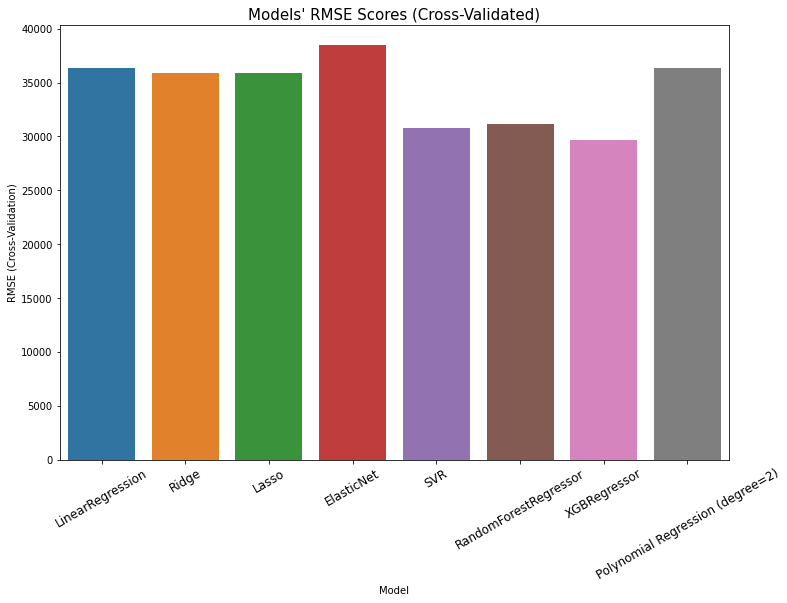

In [28]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()